In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')


In [5]:
df = pd.read_csv('/content/car data.csv')
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

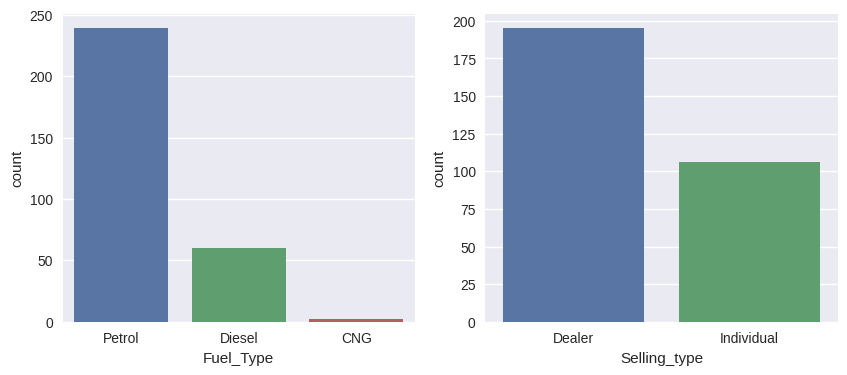

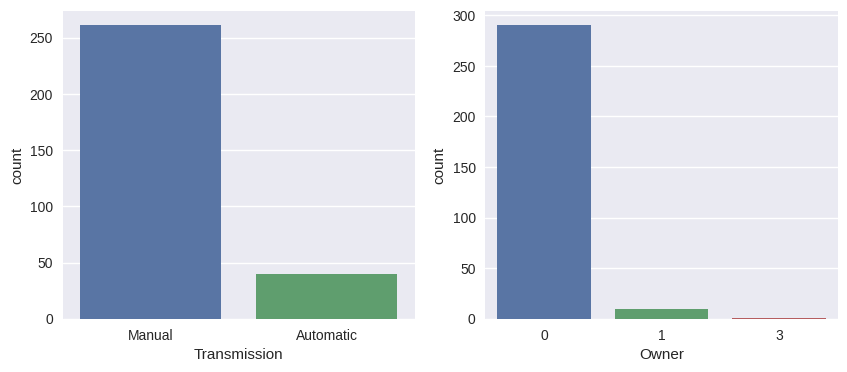

In [8]:
cat_cols = ['Fuel_Type','Selling_type','Transmission','Owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])

    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1

    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1

    plt.show()

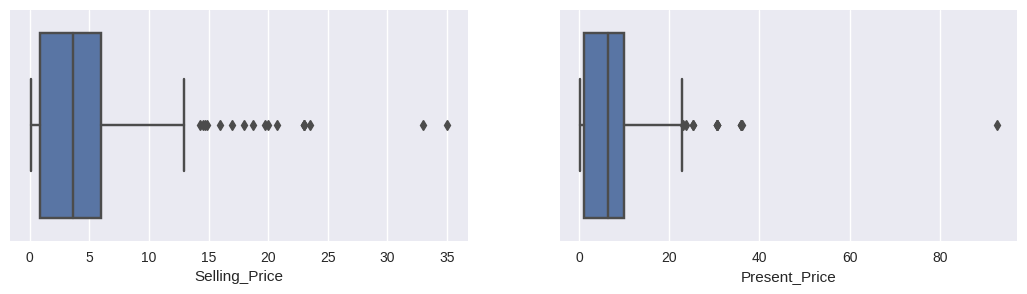

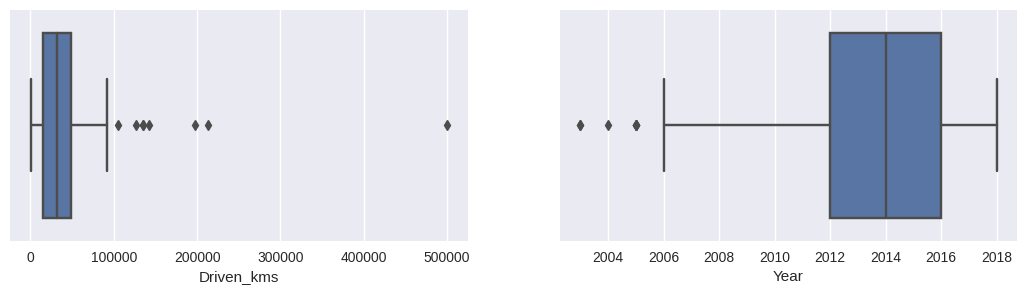

In [9]:
num_cols = ['Selling_Price','Present_Price','Driven_kms','Year']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])

    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1

    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1

    plt.show()

In [10]:
df.pivot_table(values='Selling_Price', index = 'Selling_type', columns= 'Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Selling_type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [11]:
df.pivot_table(values='Selling_Price', index = 'Selling_type', columns= 'Transmission')

Transmission,Automatic,Manual
Selling_type,,
Dealer,12.246552,5.756506
Individual,1.968182,0.743895


In [12]:
df.drop(labels='Car_Name',axis= 1, inplace = True)
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
df = pd.get_dummies(data = df,drop_first=True)
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [14]:
y = df['Selling_Price']
X = df.drop('Selling_Price',axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


In [15]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [16]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):

    model.fit(X_train,y_train)

    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))

    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))

    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))

    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))

    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    plt.show()

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.8990761  0.89776701 0.82981561 0.81795625 0.76012544]
Train CV mean : 0.84


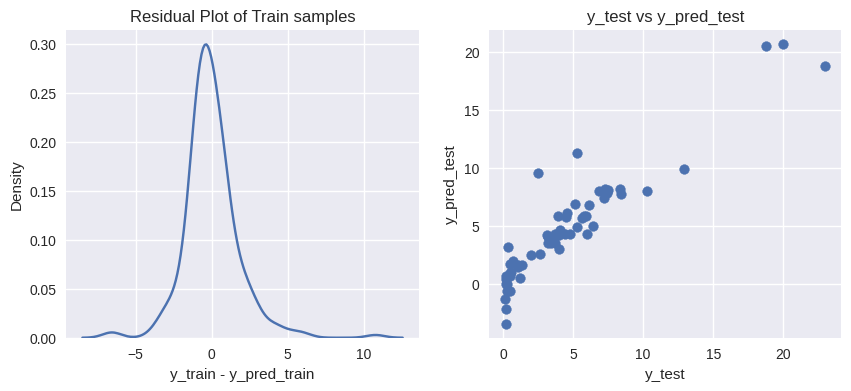

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89907549 0.89776791 0.82981785 0.81796308 0.73278673]
Train CV mean : 0.84


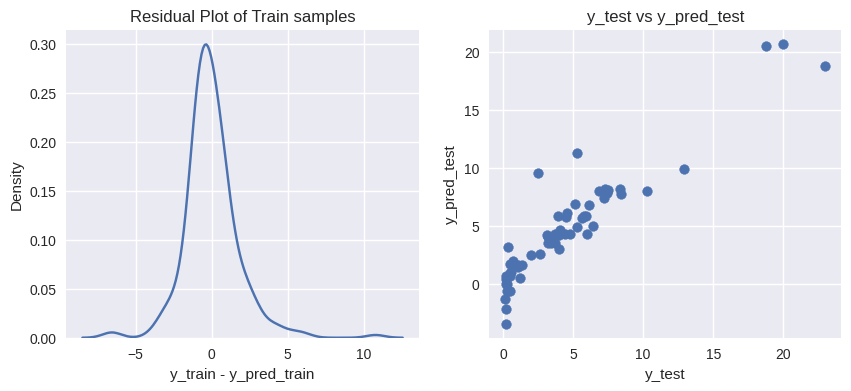

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.8990519  0.89913326 0.83017799 0.81795537 0.7012204 ]
Train CV mean : 0.83


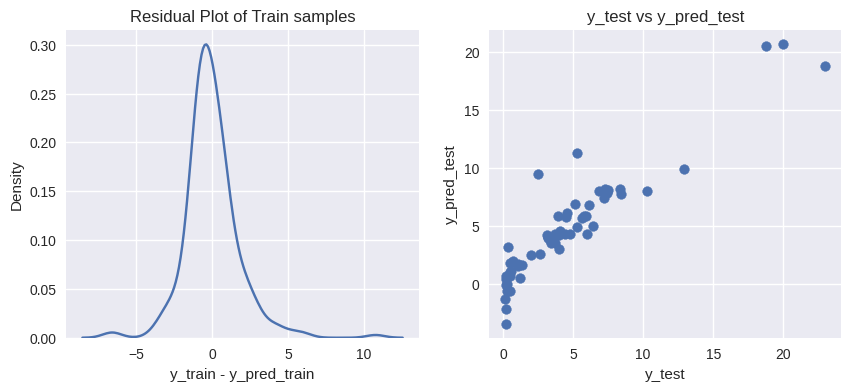

In [21]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred_model(ls_rs,"lasso.pkl")